In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mode()[0])
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mode()[0])
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mode()[0])
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [25]:
from pandas_profiling import ProfileReport


In [26]:
df = ProfileReport(data)
df.to_widgets()

<AxesSubplot:>

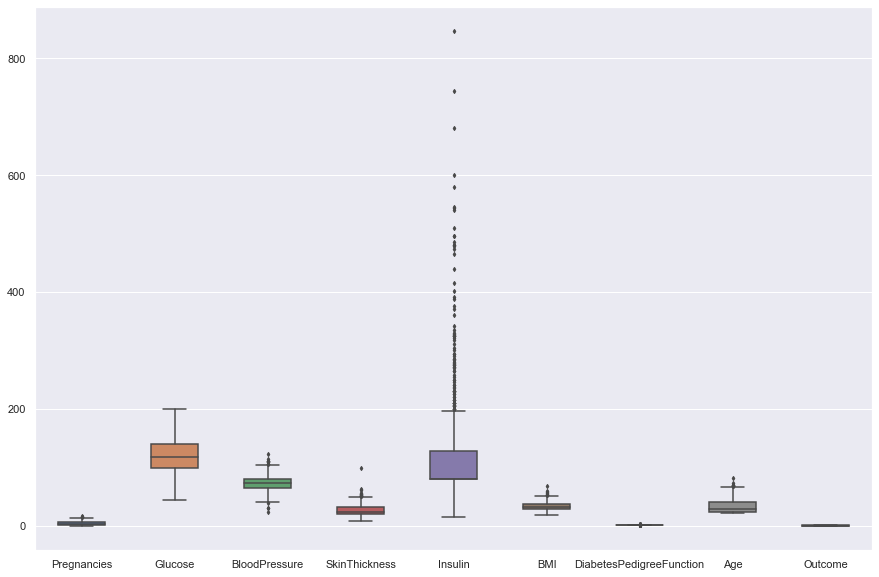

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width = 0.5, ax=ax , fliersize=3)

In [34]:
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

<AxesSubplot:>

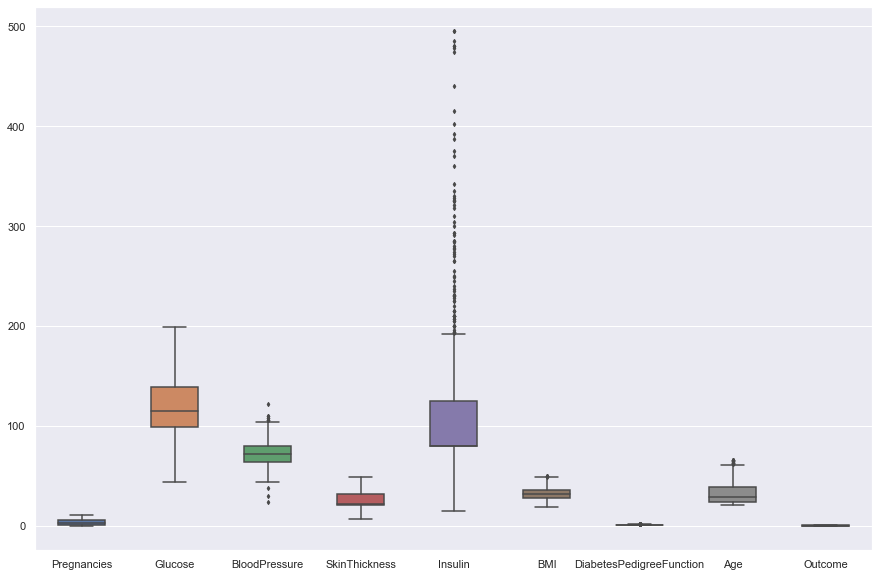

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width = 0.5, ax=ax , fliersize=3)

In [36]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [37]:
x = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [39]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns'] = x.columns
vif

,VIF,Columns
0,1.467539,Pregnancies
1,1.352875,Glucose
2,1.256538,BloodPressure
3,1.466506,SkinThickness
4,1.285430,Insulin
5,1.522355,BMI
6,1.036264,DiabetesPedigreeFunction
7,1.682776,Age


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=355)

In [43]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(x_test
                        )

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7840909090909091

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[103,  18],
       [ 20,  35]], dtype=int64)

In [47]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [48]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7840909090909091

In [49]:
Precision = true_positive/(true_positive+false_positive)
Precision


0.8512396694214877

In [50]:
Recall = true_positive/(true_positive+false_negative)
Recall


0.8373983739837398

In [51]:
F1_Score = 2*(Recall*Precision)/(Recall + Precision)
F1_Score

0.8442622950819672

In [52]:
auc = roc_auc_score(y_test, y_pred)
auc

0.743801652892562

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [54]:
fpr

array([0.        , 0.14876033, 1.        ])

In [55]:
tpr

array([0.        , 0.63636364, 1.        ])

In [56]:
thresholds

array([2, 1, 0], dtype=int64)